In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score,plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32560, 15)

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values so good to go

In [3]:
#Drop duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(32536, 15)

In [10]:
print(df.Income.value_counts())
print(df.Workclass.value_counts())
print(df.Education.value_counts())
print(df.Marital_status.value_counts())
print(df.Occupation.value_counts())
print(df.Relationship.value_counts())
print(df.Race.value_counts())
print(df.Sex.value_counts())
print(df.Native_country.value_counts())

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
 Prof-speci

In [4]:
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


In [13]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Looks like capital_gain, Hours_per_week, Age, Fnlwgt and capital_loss features having outliers.Looks like Education and Education_num are correlated

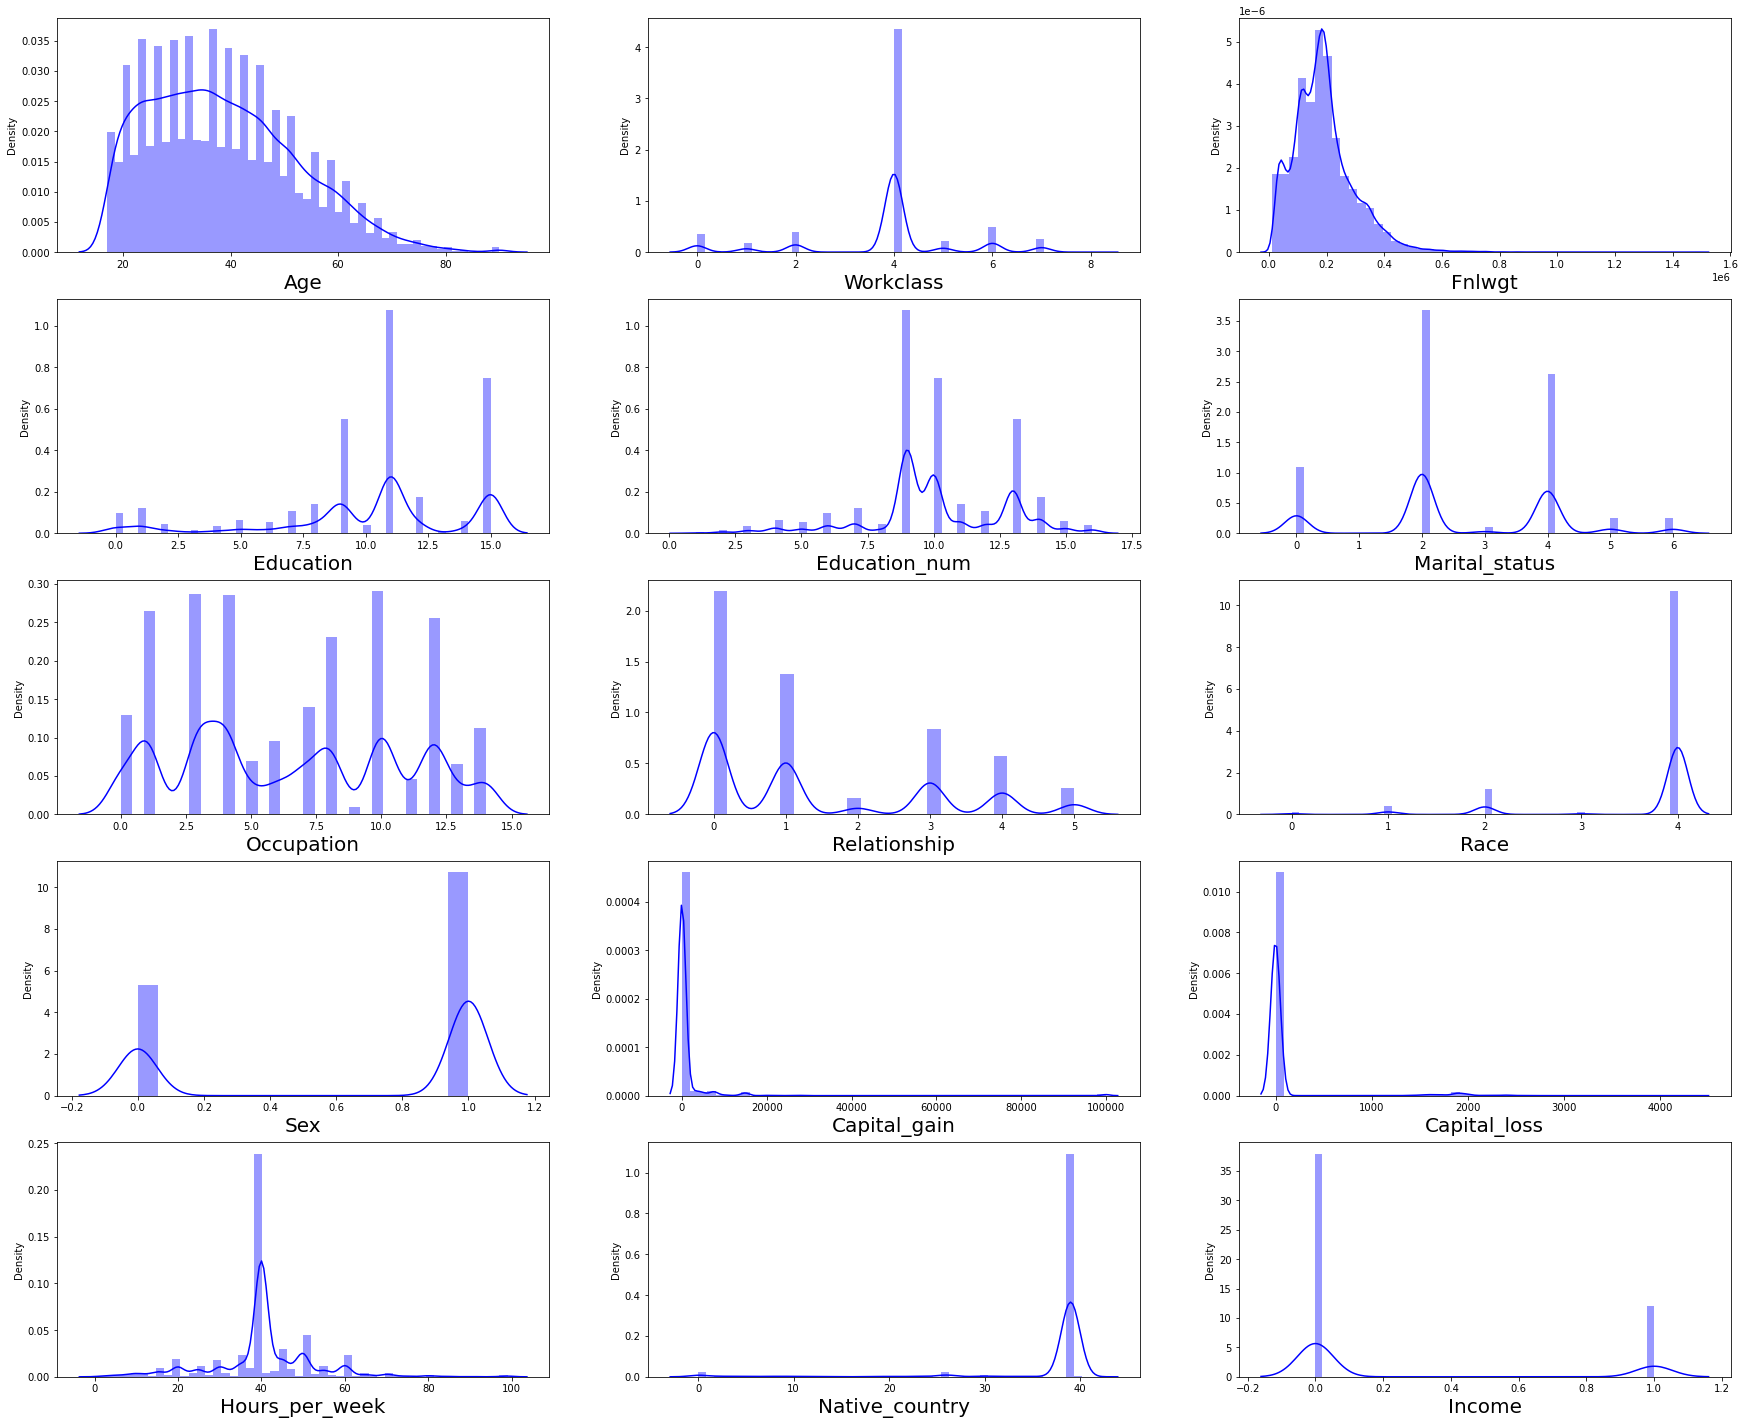

In [14]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=15:
        ax = plt.subplot(5,3,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

In [5]:
#Outliers removal using zscore method
from scipy.stats import zscore
#Features having outliers
features=df[['Capital_gain','Hours_per_week','Age','Fnlwgt','Capital_loss']]
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


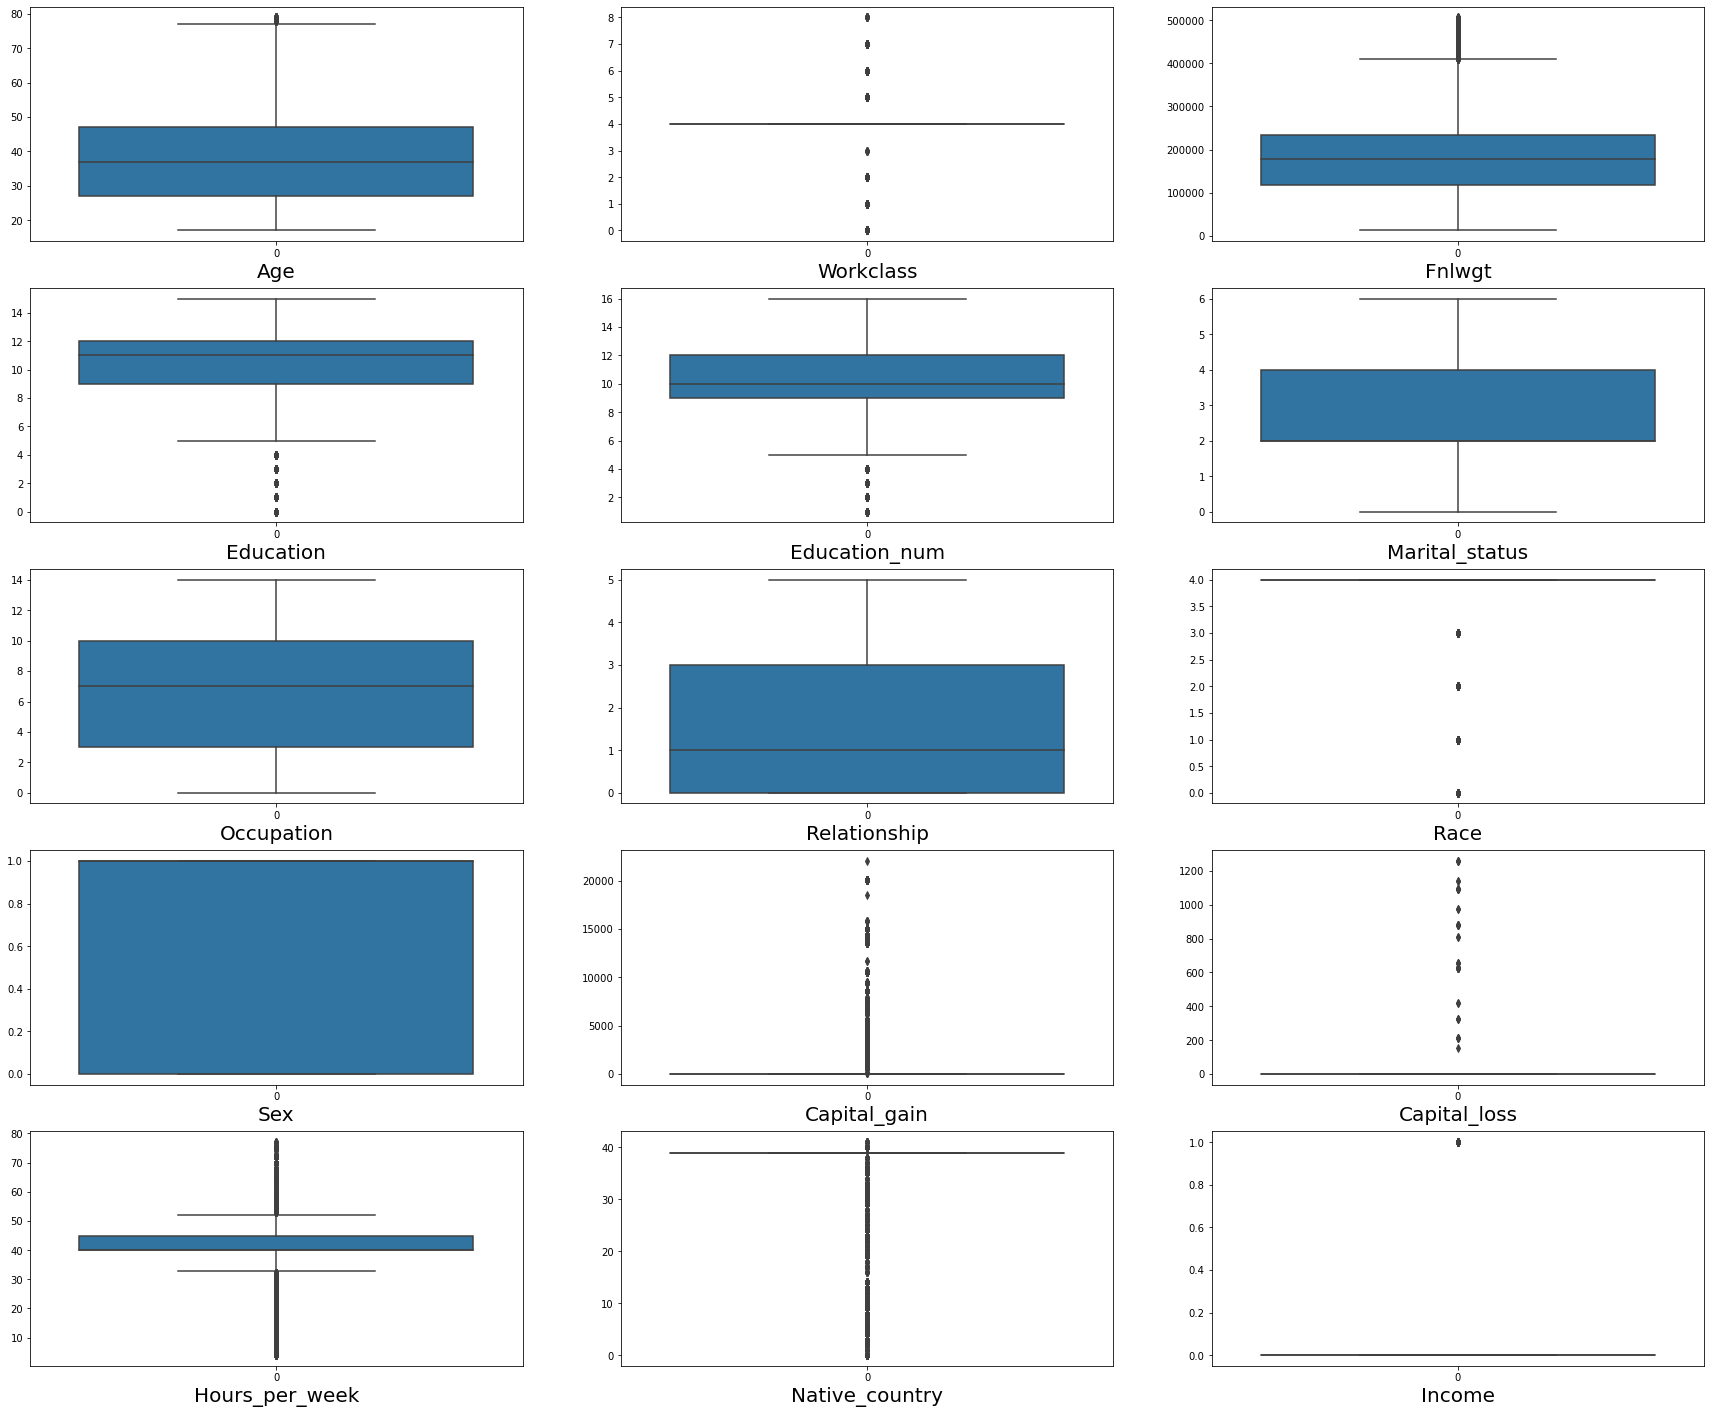

In [16]:
#Let's visualize the data using boxplot after outliers removal using zscore
plt.figure(figsize=(30,25))
n=1
for column in df_new:
    if n<=15:
        ax=plt.subplot(5,3,n)
        sns.boxplot(data=df_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    n+=1
plt.show()

In [6]:
#Still there exists more outliers so let us transform the data using power transformer
scaler = PowerTransformer(method='yeo-johnson')
features = ['Capital_gain','Hours_per_week','Age','Fnlwgt','Capital_loss']
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features]

,Capital_gain,Hours_per_week,Age,Fnlwgt,Capital_loss
0,-0.296119,-2.216862,0.924401,-1.116187,-0.040028
1,-0.296119,-0.034958,0.126509,0.422190,-0.040028
2,-0.296119,-0.034958,1.099341,0.601942,-0.040028
3,-0.296119,-0.034958,-0.711882,1.480433,-0.040028
4,-0.296119,-0.034958,0.051237,1.042640,-0.040028
...,...,...,...,...,...
32555,-0.296119,-0.217888,-0.808314,0.806332,-0.040028
32556,-0.296119,-0.034958,0.272405,-0.211102,-0.040028
32557,-0.296119,-0.034958,1.373877,-0.238776,-0.040028
32558,-0.296119,-1.720527,-1.337967,0.284060,-0.040028


In [18]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.924401,6,-1.116187,9,13,2,4,0,4,1,-0.296119,-0.040028,-2.216862,39,0
1,0.126509,4,0.422190,11,9,0,6,1,4,1,-0.296119,-0.040028,-0.034958,39,0
2,1.099341,4,0.601942,1,7,2,6,0,2,1,-0.296119,-0.040028,-0.034958,39,0
3,-0.711882,4,1.480433,9,13,2,10,5,2,0,-0.296119,-0.040028,-0.034958,5,0
4,0.051237,4,1.042640,12,14,2,4,5,4,0,-0.296119,-0.040028,-0.034958,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.808314,4,0.806332,7,12,2,13,5,4,0,-0.296119,-0.040028,-0.217888,39,0
32556,0.272405,4,-0.211102,11,9,2,7,0,4,1,-0.296119,-0.040028,-0.034958,39,1
32557,1.373877,4,-0.238776,11,9,6,1,4,4,0,-0.296119,-0.040028,-0.034958,39,0
32558,-1.337967,4,0.284060,11,9,4,1,3,4,1,-0.296119,-0.040028,-1.720527,39,0


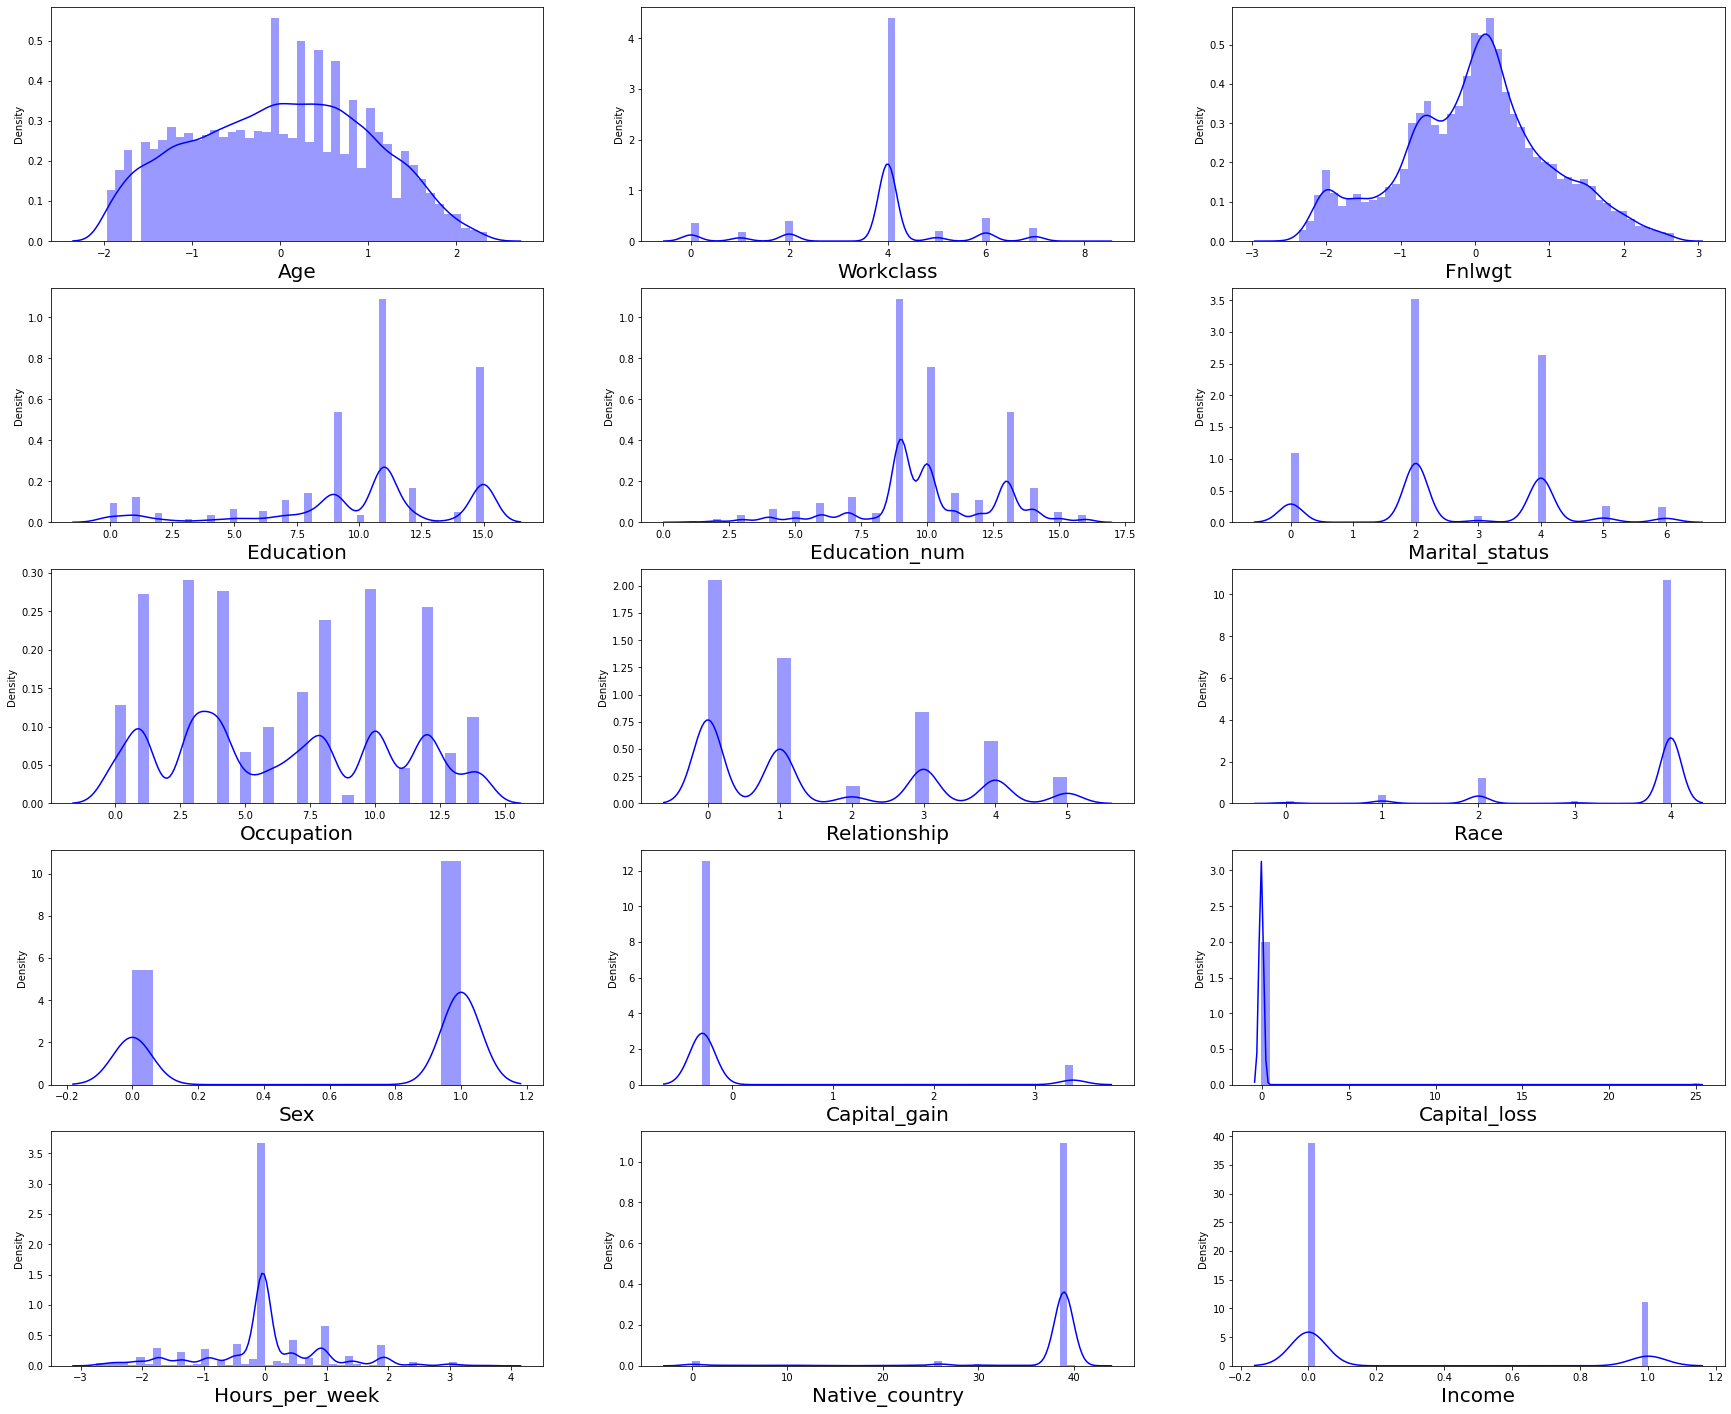

In [19]:
#Visualize the data distribution after log transformation
plt.figure(figsize = (30,25))
n = 1

for column in df_new:
    if n <=15:
        ax = plt.subplot(5,3,n)
        sns.distplot(df_new[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

Now the data looks better, we shall continue

In [20]:
#Checking shape of new dataset
df_new.shape

(30006, 15)

In [21]:
#Checking dataloss
Dataloss = (((32560-30006)/32560)*100)
print(Dataloss)

7.843980343980345


So, I can see 7.8% dataloss.I feel it is ok as we had some duplicates and also too many outliers in some features

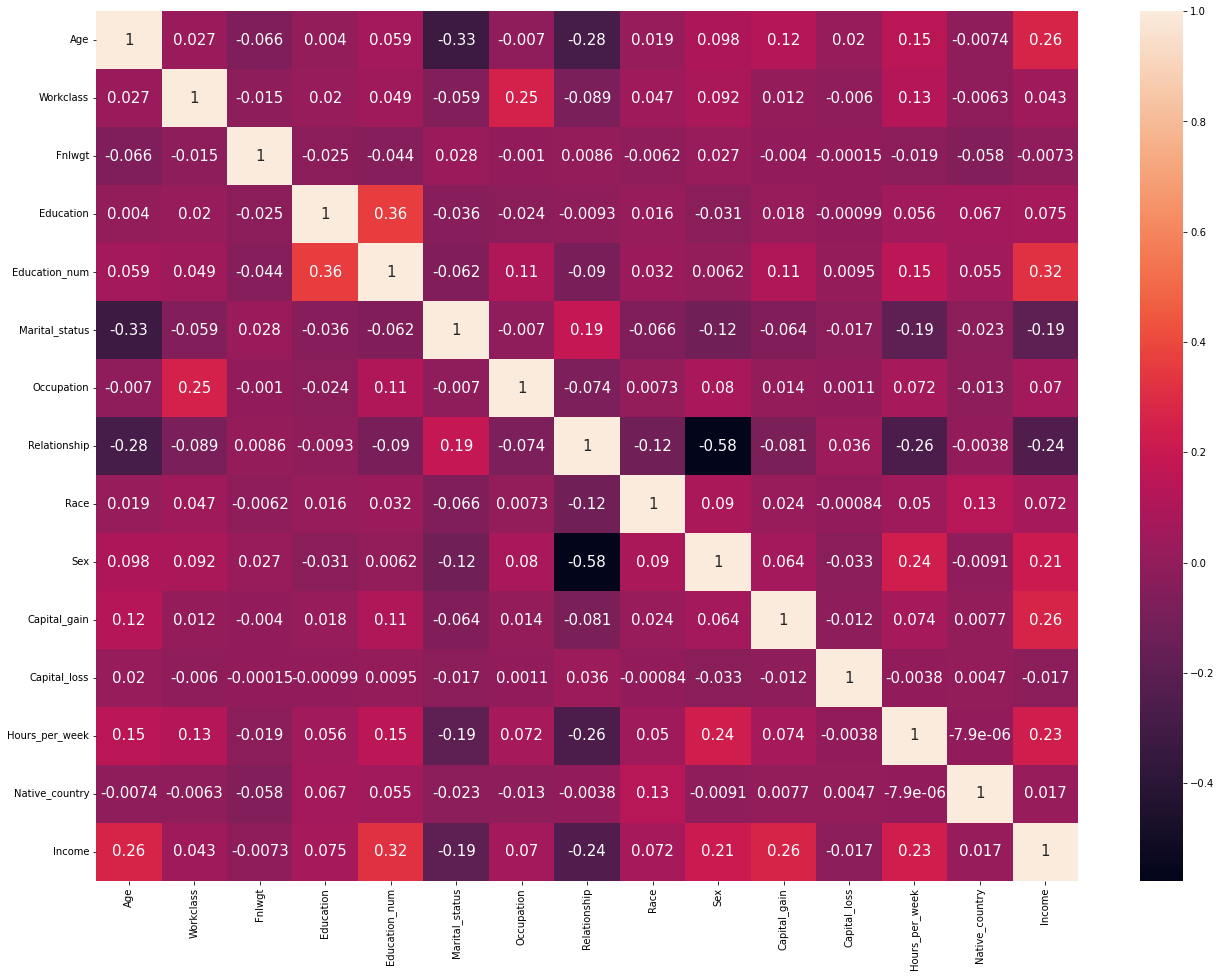

In [22]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df_new.corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15})
plt.show()

So there is no multicollinearity problem

In [23]:
#As the target is binary categorical,let us check for data imbalance
df_new['Income'].value_counts()

0    23349
1     6657
Name: Income, dtype: int64

We can see that the data is imbalance let us fix it

In [7]:
x = df_new.drop('Income',axis=1)
y = df_new.Income

In [8]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [80]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\smith\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.12.0-py39hcbf5309_0








==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
from imblearn.under_sampling import NearMiss
from collections import Counter
ns = NearMiss(0.75)
x_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit :",format(Counter(y_train)))
print("The number of classes after fit :",format(Counter(y_train_ns)))

The number of classes before fit : Counter({0: 17420, 1: 5084})
The number of classes after fit : Counter({0: 6778, 1: 5084})


In [22]:
# Model instantiation with default parameters
lr = LogisticRegression()
# Train the model
lr.fit(x_train_ns,y_train_ns)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5929
           1       0.45      0.57      0.50      1573

    accuracy                           0.76      7502
   macro avg       0.66      0.69      0.67      7502
weighted avg       0.79      0.76      0.77      7502



In [23]:
#Let us improve the accuracy using gridsearchcv
params = {'n_jobs':[1,2,3],'penalty':['l1','l2'],'max_iter':range(50,150,10)}
grid_search = GridSearchCV(lr,params,cv=10)
grid_search.fit(x_train_ns,y_train_ns)
best_params = grid_search.best_params_
best_params

{'max_iter': 70, 'n_jobs': 1, 'penalty': 'l2'}

In [24]:
lr = LogisticRegression(n_jobs=1,penalty='l2',max_iter=70)
# Train the model
lr.fit(x_train_ns,y_train_ns)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5929
           1       0.45      0.57      0.50      1573

    accuracy                           0.76      7502
   macro avg       0.66      0.69      0.67      7502
weighted avg       0.79      0.76      0.77      7502



Not able to improve the performance even after hyperparameter tuning

In [25]:
#Check if model is overfitting
print(cross_val_score(lr,x,y,cv=5).mean())

0.81936952527239


Model is not overfitting

In [26]:
# model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train_ns,y_train_ns)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73      5929
           1       0.32      0.66      0.43      1573

    accuracy                           0.63      7502
   macro avg       0.60      0.64      0.58      7502
weighted avg       0.76      0.63      0.67      7502



In [27]:
params = { 'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,8),'min_samples_split':range(3,8)}
grid_search = GridSearchCV(dtc,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(x_train_ns,y_train_ns)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [28]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=4,min_samples_split=4)
dtc.fit(x_train_ns,y_train_ns)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      5929
           1       0.39      0.63      0.48      1573

    accuracy                           0.71      7502
   macro avg       0.63      0.68      0.64      7502
weighted avg       0.78      0.71      0.73      7502



Accuracy improved from 63% to 71% after hyperparameter tuning

In [29]:
#Check if model is overfitting
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8545625157108937


In [30]:
# Model instantiation with default parameters
rfc = RandomForestClassifier()
# Train the model
rfc.fit(x_train_ns,y_train_ns)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      5929
           1       0.38      0.67      0.48      1573

    accuracy                           0.70      7502
   macro avg       0.63      0.69      0.63      7502
weighted avg       0.78      0.70      0.72      7502



In [31]:
params = { 'n_estimators':[13,15],'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(5,6),'min_samples_split':range(10,11)}
grid_search = GridSearchCV(rfc,param_grid=params)
grid_search.fit(x_train_ns,y_train_ns)
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 13}

In [32]:
rfc=RandomForestClassifier(n_estimators=13,criterion='entropy',max_depth=11,min_samples_leaf=5,min_samples_split=10)
rfc.fit(x_train_ns,y_train_ns)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5929
           1       0.47      0.62      0.54      1573

    accuracy                           0.78      7502
   macro avg       0.68      0.72      0.69      7502
weighted avg       0.80      0.78      0.79      7502



Accuracy improved from 70% to 78% after hyperparameter tuning

In [33]:
#Check if model is overfitting
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8584285658043997


In [10]:
# Model instantiation with default parameters
gbc = GradientBoostingClassifier()
# Train the model
gbc.fit(x_train_ns,y_train_ns)
gbc_pred = gbc.predict(x_test)
print(classification_report(y_test,gbc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5929
           1       0.49      0.64      0.56      1573

    accuracy                           0.78      7502
   macro avg       0.69      0.73      0.71      7502
weighted avg       0.81      0.78      0.79      7502



In [11]:
params = {'learning_rate':np.arange(0.1,1,0.1),'max_depth':range(2,8,2),'min_samples_split':range(4,8,2)}
grid_search = GridSearchCV(gbc,param_grid=params)
grid_search.fit(x_train_ns,y_train_ns)
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [15]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=2,min_samples_split=4)
gbc.fit(x_train_ns,y_train_ns)
gbc_pred=gbc.predict(x_test)
print(classification_report(y_test,gbc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5929
           1       0.52      0.60      0.56      1573

    accuracy                           0.80      7502
   macro avg       0.71      0.73      0.72      7502
weighted avg       0.81      0.80      0.81      7502



Accuracy improved from 78% to 80% after hyperparameter tuning

In [16]:
#Check if model is overfitting
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8592616492164113


In [17]:
# Model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train_ns,y_train_ns)
knn_pred = knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      5929
           1       0.41      0.64      0.50      1573

    accuracy                           0.73      7502
   macro avg       0.65      0.70      0.66      7502
weighted avg       0.79      0.73      0.75      7502



In [18]:
params = { 'algorithm':['kd_tree','brute'],'leaf_size':[6,7,8,10,11,14],'n_neighbors':[3,5,7,9,11,13]}
grid_search = GridSearchCV(knn,param_grid=params)
grid_search.fit(x_train_ns,y_train_ns)
best_params = grid_search.best_params_
best_params

{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_neighbors': 13}

In [19]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=6,n_neighbors=13)
knn.fit(x_train_ns,y_train_ns)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84      5929
           1       0.46      0.66      0.55      1573

    accuracy                           0.77      7502
   macro avg       0.68      0.73      0.69      7502
weighted avg       0.81      0.77      0.78      7502



In [ ]:
Accuracy improved from 73% to 77% after hyperparameter tuning

In [20]:
#Check if model is overfitting
print(cross_val_score(knn,x,y,cv=5).mean())

0.8345999592092864


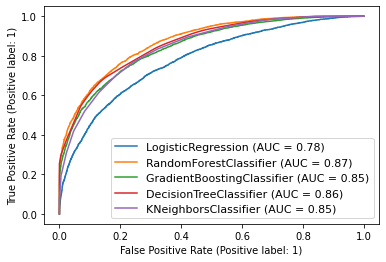

In [34]:
#let me plot roc curve to chose the best model
disp = plot_roc_curve(lr,x_train_ns,y_train_ns)
plot_roc_curve(rfc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(gbc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(dtc,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

So based on the accuracy the best fit model is RandomForestClassifier

In [35]:
# save the model to disk
filename = 'Census_Income_Model.sav'
pickle.dump(rfc, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 1, 0, ..., 0, 1, 0])

In [36]:
pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501
Predicted,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,1,0,1,0
Original,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
